# Agregando Regiões Geográficas

In [5]:
%matplotlib inline
import geopandas as gpd

In [6]:
setor = gpd.read_file('../Dados/Mapas/RJ-SETOR/RJ-SETOR-CENSO.shp')

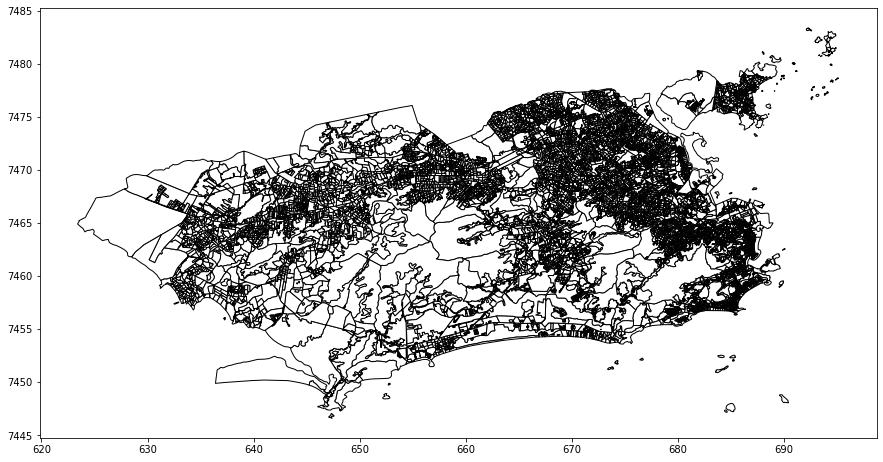

In [7]:
setor.plot(color='white', edgecolor='black', figsize=(15, 8))

In [8]:
setor.head(2)

,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,330455705060018,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,...,1.77,687.86,607487.37,1162.52,474104.49,468.88,439565.17,993.66,410002.85,"POLYGON ((683.349 7469.178, 683.314 7469.182, ..."
1,330455705060019,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,...,2.06,645.95,443290.44,955.47,359529.36,436.96,323403.61,844.44,280771.01,"POLYGON ((683.309 7469.214, 683.297 7469.202, ..."


In [9]:
#CRS UTM que está no arquivo não aceita projeções regionais para agregar bairros, é necessário passar uma global
setor = setor.to_crs({'init': 'epsg:4326'})
#filtra apenas colunas de bairros e geometria
setor_m = setor[['NM_BAIRRO', 'geometry']]

In [11]:
#agregar setores pequenos por bairro
bairro = setor_m.dissolve(by='NM_BAIRRO')

In [12]:
display(bairro.shape)
display(bairro[0:10])

(160, 1)

,geometry
NM_BAIRRO,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8..."
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8..."
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9..."
Anchieta,"POLYGON ((-43.38540 -22.82689, -43.38524 -22.8..."
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9..."
Anil,"POLYGON ((-43.33059 -22.95754, -43.33038 -22.9..."
Bancários,"MULTIPOLYGON (((-43.16938 -22.80042, -43.16937..."
Bangu,"POLYGON ((-43.50571 -22.86799, -43.50596 -22.8..."
Barra da Tijuca,"MULTIPOLYGON (((-43.30796 -23.03868, -43.30796..."


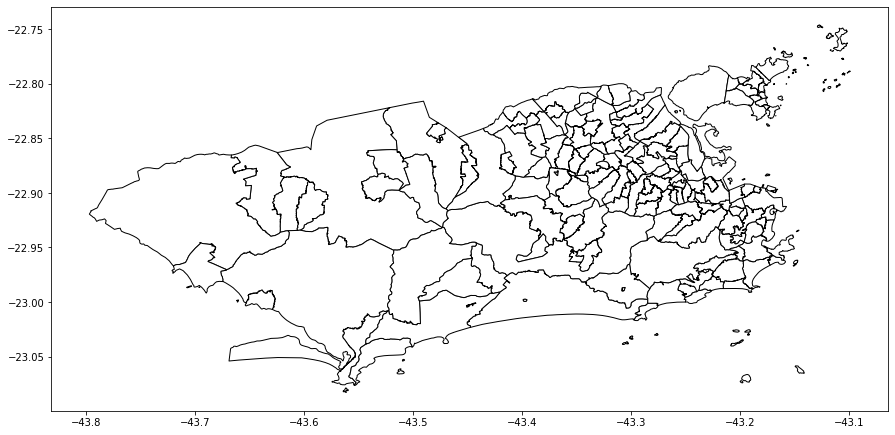

In [13]:
#exibe mapa dos setores agregado por bairro 
bairro.plot(color='white', edgecolor='black', figsize=(15, 8))

In [15]:
#adicionando variável V002 que é a população do setor censitário (agora agregado por bairro)
setor_m = setor[['NM_BAIRRO', 'geometry', 'V002']]

In [16]:
#soma os valores de população por setor censitário agrupado por bairro
bairro = setor_m.dissolve(by='NM_BAIRRO', aggfunc='sum')

In [17]:
bairro[0:10]

,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8...",11356.0
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8...",26967.0
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9...",9189.0
Anchieta,"POLYGON ((-43.38540 -22.82689, -43.38524 -22.8...",55634.0
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9...",39325.0
Anil,"POLYGON ((-43.33059 -22.95754, -43.33038 -22.9...",24156.0
Bancários,"MULTIPOLYGON (((-43.16938 -22.80042, -43.16937...",12512.0
Bangu,"POLYGON ((-43.50571 -22.86799, -43.50596 -22.8...",240666.0
Barra da Tijuca,"MULTIPOLYGON (((-43.30796 -23.03868, -43.30796...",135920.0


In [19]:
#confere se valores agregados batem
display(setor_m['V002'].sum(), bairro['V002'].sum())

6283486.0

6283486.0

In [20]:
#altera o CRS do geoDF de bairros de volta para o UTM, pois foi convertido para um global para agregar
bairro = bairro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [21]:
#reseta o indice do DF para o NM_BAIRRO voltar a ser apenas coluna
bairro.reset_index(inplace=True)

In [22]:
bairro[0:10]

,NM_BAIRRO,geometry,V002
0,Abolição,"POLYGON ((674.902 7467.737, 674.936 7467.767, ...",11356.0
1,Acari,"POLYGON ((670.474 7474.718, 670.405 7474.689, ...",26967.0
2,Alto da Boa Vista,"POLYGON ((674.901 7457.693, 674.898 7457.693, ...",9189.0
3,Anchieta,"POLYGON ((665.693 7474.737, 665.709 7474.722, ...",55634.0
4,Andaraí,"POLYGON ((679.002 7462.700, 679.002 7462.700, ...",39325.0
5,Anil,"POLYGON ((671.154 7460.208, 671.176 7460.202, ...",24156.0
6,Bancários,"MULTIPOLYGON (((687.902 7477.410, 687.903 7477...",12512.0
7,Bangu,"POLYGON ((653.298 7470.317, 653.272 7470.309, ...",240666.0
8,Barra da Tijuca,"MULTIPOLYGON (((673.371 7451.196, 673.371 7451...",135920.0
9,Barra de Guaratiba,"MULTIPOLYGON (((647.366 7446.582, 647.352 7446...",3545.0


In [23]:
#salva o geoDF de bairros
import os
dir = '../Dados/Mapas/RJ-BAIRROS'
if not os.path.exists(dir):
    os.makedirs(dir)
bairro.to_file(dir + '/RJ-BAIRRO.shp')